<a href="https://colab.research.google.com/github/adiaux/MachineLearning/blob/main/Hands-on%20ML2/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
x=2*np.random.rand(100,1)
y=3+3*np.random.rand(100,1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), x]

In [ ]:
x_b=np.stack((np.ones((100,1)).flatten().reshape(x.shape),x),axis=1).flatten().reshape(100,2)

In [ ]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [ ]:
theta_best

array([[4.42155456],
       [0.06856175]])

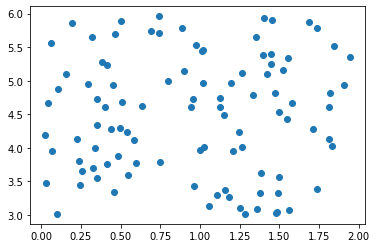

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,y)

In [ ]:
x_new=np.array([[0],[2]])
x_new_b=np.stack((np.ones((2,1)),x_new),axis=1).flatten().reshape(2,2)

In [ ]:
y_pred=x_new_b.dot(theta_best)

In [ ]:
y_pred

array([[4.42155456],
       [4.55867806]])

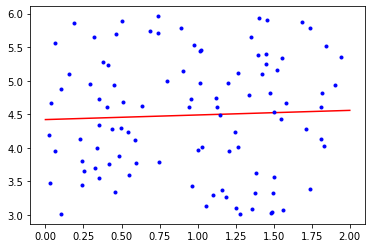

In [ ]:
plt.plot(x_new, y_pred, "r-")
plt.plot(x, y, "b.")

# Performing Linera Regression on the same set

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_clf=LinearRegression()
lin_clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_clf.predict(x_new)

array([[4.42155456],
       [4.55867806]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

In [ ]:
theta_best_svd

array([[4.42155456],
       [0.06856175]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.42155456],
       [0.06856175]])

# Gradient Descent 

In [ ]:
eta=0.1
n_iterations=1000
m=100

In [ ]:
theta=np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
  gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
  theta=theta-eta*gradients

In [ ]:
theta

array([[4.42155456],
       [0.06856175]])

# Stochastic Gradient Descent Basic

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi,yi,gradients = X_b[random_index:random_index+1],y[random_index:random_index+1],2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.43746163],
       [0.08946512]])

# Stochastic Gradient Descent Using sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.42055072]), array([0.18846246]))

# Polynomial regresssion

In [ ]:
m,x,y=100,6*np.random.randn(m,1)-3,0.5*+x**2+x+2+np.random.randn(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)

In [ ]:
x[0]

array([-13.78773233])

In [ ]:
x_poly[0]

array([-13.78773233, 190.10156273])

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.coef_,lin_reg.intercept_

(array([[0.02213007, 0.00267161]]), array([3.46917458]))

# Learning Curve

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,x,y):
  x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(x_train)):
    model.fit(x_train[:m],y_train[:m])
    y_train_pred=model.predict(x_train[:m])
    y_val_pred=model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

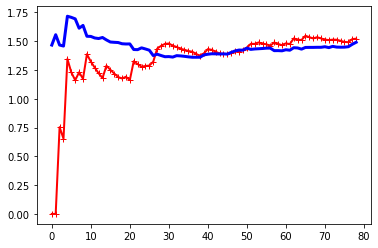

In [ ]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)

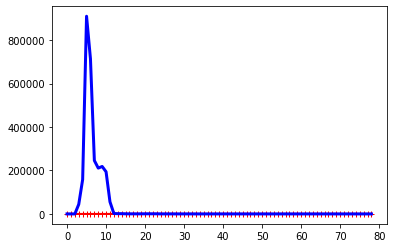

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),])
plot_learning_curve(polynomial_regression, x, y)